In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats

In [2]:
train_df=pd.read_csv(r'intern_train.csv')

In [3]:
y_df=pd.read_csv(r'df_y.csv')

In [4]:
y_df.head(5)

,untitled0
0,1
1,0
2,0
3,1
4,0


In [5]:
y_df.shape

(1000, 1)

In [6]:
y_df.rename(columns={'untitled0':'target'},inplace=True)

In [7]:
y_df.head(5)

,target
0,1
1,0
2,0
3,1
4,0


In [8]:
y_df['target'].value_counts()

1    510
0    490
Name: target, dtype: int64

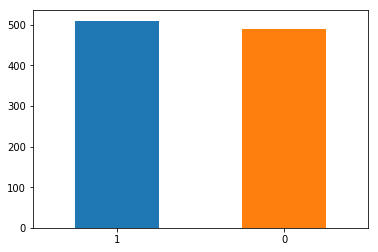

In [9]:
(y_df['target'].value_counts()).plot.bar(x='lab', y='val', rot=0)

<h2>The data is balanced</h2>

<h4>Let's sample 20 points from the respective distribution and make the data perfectly balanced</h4>

<h4>Let's rename the columns in the data</h4>

In [10]:
train_df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [11]:
train_df.rename(columns={'Unnamed: 0':0, 'Unnamed: 1':1,'Unnamed: 2':2,'Unnamed: 3':3, 'Unnamed: 4':4,'Unnamed: 5':5,'Unnamed: 6':6, 'Unnamed: 7':7,'Unnamed: 8':8,'Unnamed: 9':9, 'Unnamed: 10':10,'Unnamed: 11':11,'Unnamed: 12':12, 'Unnamed: 13':13,'Unnamed: 14':14,'Unnamed: 15':15, 'Unnamed: 16':16,'Unnamed: 17':17,'Unnamed: 18':18, 'Unnamed: 19':19,'Unnamed: 20':20,'Unnamed: 21':21, 'Unnamed: 22':22,'Unnamed: 23':23,'Unnamed: 24':24, 'Unnamed: 25':25,'Unnamed: 26':26,'Unnamed: 27':27, 'Unnamed: 28':28,'Unnamed: 29':29,'Unnamed: 30':30, 'Unnamed: 31':31,'Unnamed: 32':32,'Unnamed: 33':33, 'Unnamed: 34':34,'Unnamed: 35':35,'Unnamed: 36':36, 'Unnamed: 37':37,'Unnamed: 38':38,'Unnamed: 39':39}, inplace=True)

In [12]:
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


<h4>Let's find mean,std,kurtosis,skewness of a all the data and transform into normal distribution so tat it work well for most of ML algorithms</h4>

In [13]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [14]:
train_df[0].head(5)

0    0.299403
1   -1.174176
2    1.192222
3    1.573270
4   -0.613071
Name: 0, dtype: float64

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


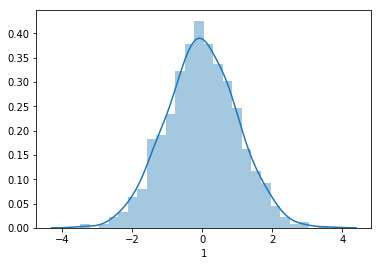

In [15]:
sns.distplot(train_df[1])

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


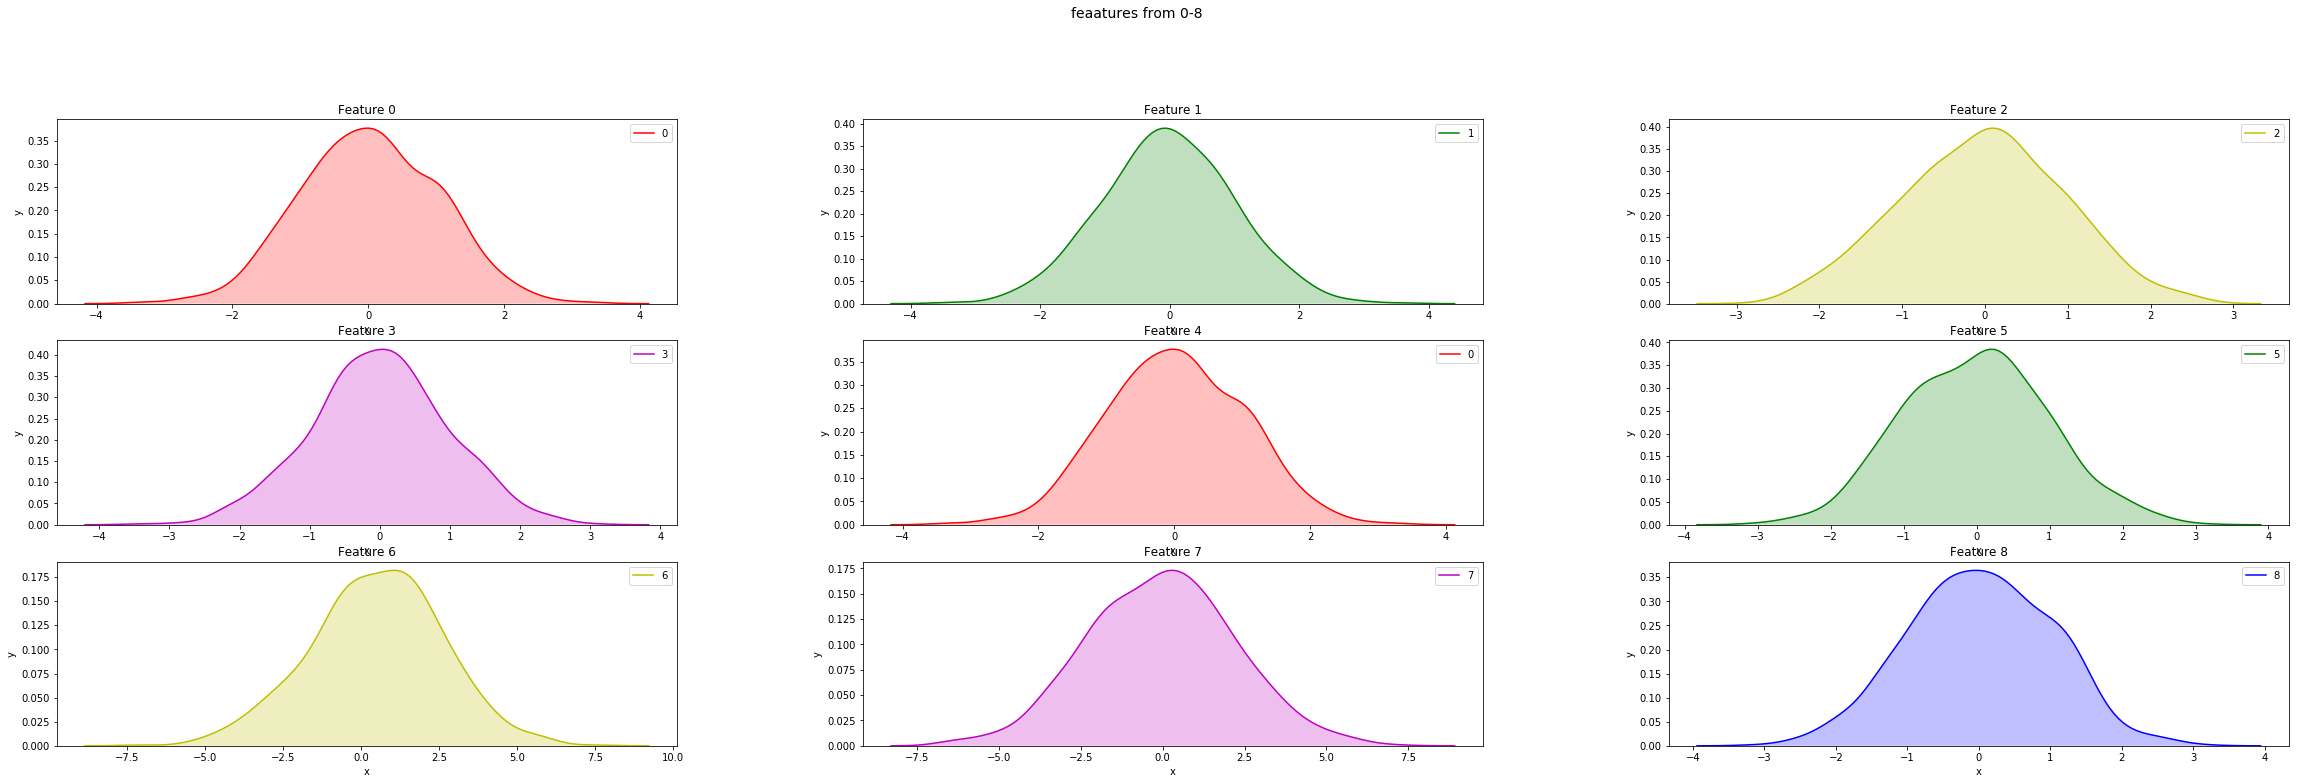

In [16]:
fig = plt.figure(figsize=(40,12))
title = fig.suptitle("feaatures from 0-8", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(3,3,1)
ax1.set_title("Feature 0")
ax1.set_xlabel("x")
ax1.set_ylabel("y") 
sns.kdeplot(train_df[0], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(3,3,2)
ax2.set_title("Feature 1")
ax2.set_xlabel("x")
ax2.set_ylabel("y") 
sns.kdeplot(train_df[1], ax=ax2, shade=True, color='g')

ax3 = fig.add_subplot(3,3,3)
ax3.set_title("Feature 2")
ax3.set_xlabel("x")
ax3.set_ylabel("y") 
sns.kdeplot(train_df[2], ax=ax3, shade=True, color='y')

ax4 = fig.add_subplot(3,3,4)
ax4.set_title("Feature 3")
ax4.set_xlabel("x")
ax4.set_ylabel("y") 
sns.kdeplot(train_df[3], ax=ax4, shade=True, color='m')

ax5 = fig.add_subplot(3,3,5)
ax5.set_title("Feature 4")
ax5.set_xlabel("x")
ax5.set_ylabel("y") 
sns.kdeplot(train_df[0], ax=ax5, shade=True, color='r')

ax6 = fig.add_subplot(3,3,6)
ax6.set_title("Feature 5")
ax6.set_xlabel("x")
ax6.set_ylabel("y") 
sns.kdeplot(train_df[5], ax=ax6, shade=True, color='g')

ax7 = fig.add_subplot(3,3,7)
ax7.set_title("Feature 6")
ax7.set_xlabel("x")
ax7.set_ylabel("y") 
sns.kdeplot(train_df[6], ax=ax7, shade=True, color='y')

ax8 = fig.add_subplot(3,3,8)
ax8.set_title("Feature 7")
ax8.set_xlabel("x")
ax8.set_ylabel("y") 
sns.kdeplot(train_df[7], ax=ax8, shade=True, color='m')

ax9 = fig.add_subplot(3,3,9)
ax9.set_title("Feature 8")
ax9.set_xlabel("x")
ax9.set_ylabel("y") 
sns.kdeplot(train_df[8], ax=ax9, shade=True, color='b')

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


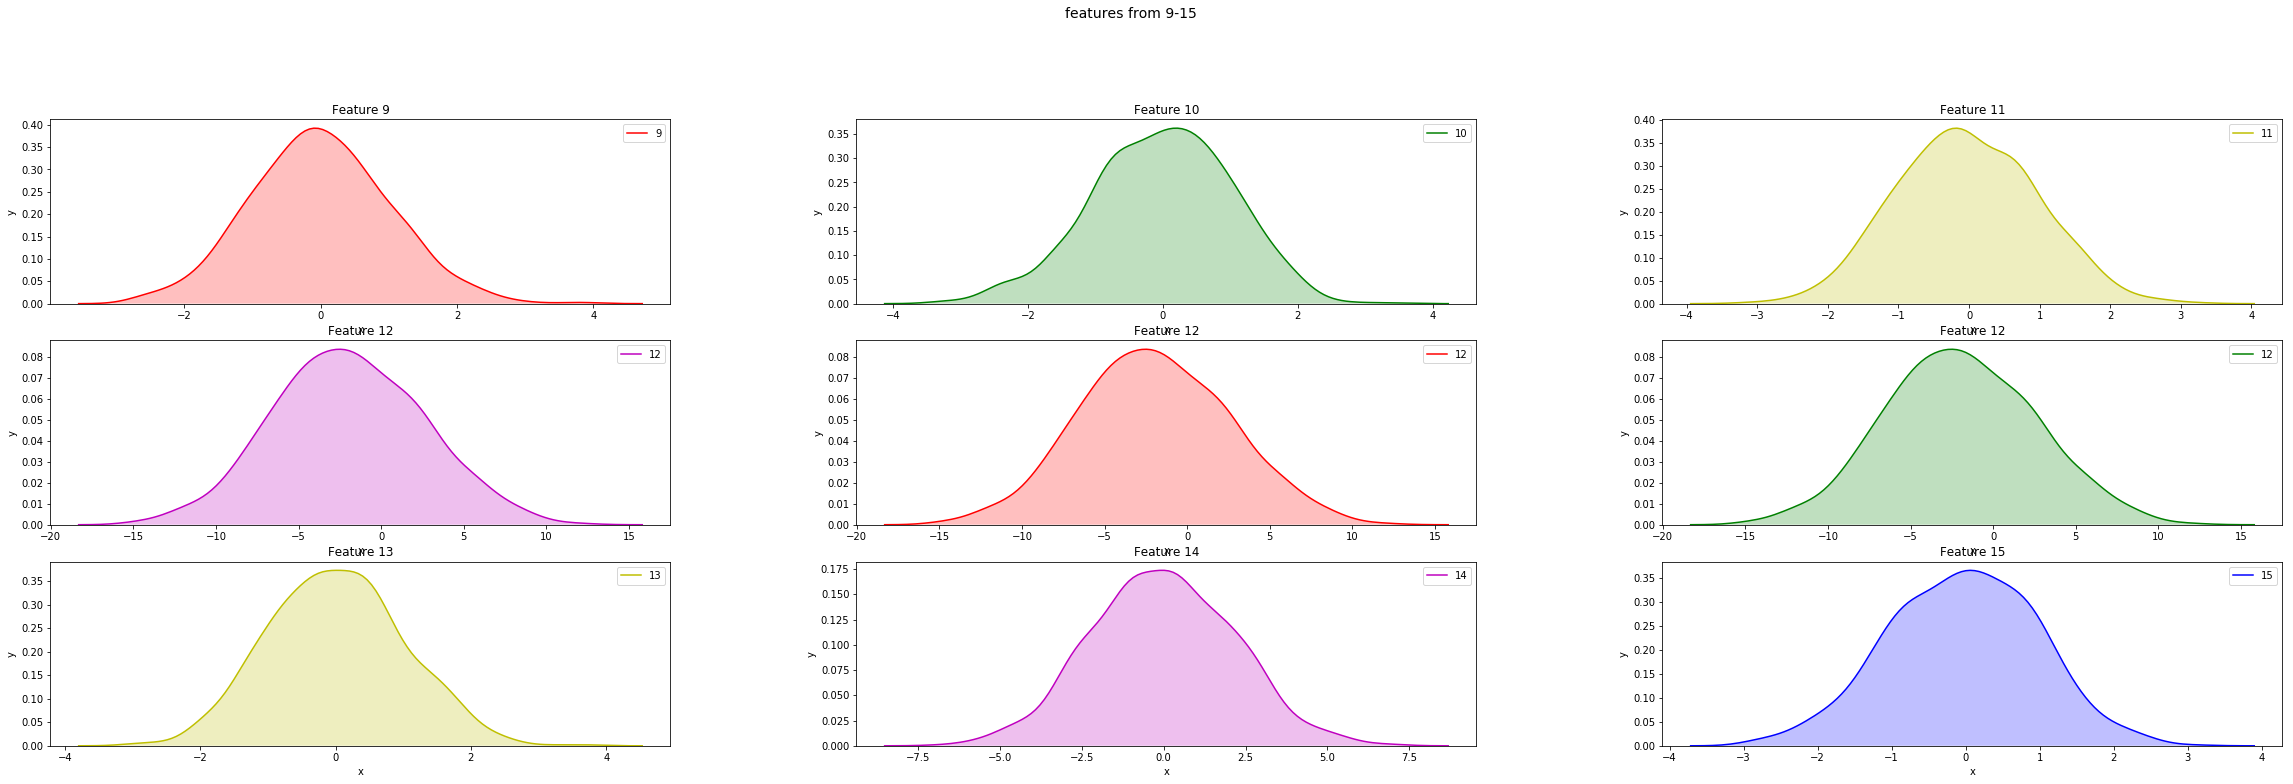

In [17]:
fig = plt.figure(figsize=(40,12))
title = fig.suptitle("features from 9-15", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(3,3,1)
ax1.set_title("Feature 9")
ax1.set_xlabel("x")
ax1.set_ylabel("y") 
sns.kdeplot(train_df[9], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(3,3,2)
ax2.set_title("Feature 10")
ax2.set_xlabel("x")
ax2.set_ylabel("y") 
sns.kdeplot(train_df[10], ax=ax2, shade=True, color='g')

ax3 = fig.add_subplot(3,3,3)
ax3.set_title("Feature 11")
ax3.set_xlabel("x")
ax3.set_ylabel("y") 
sns.kdeplot(train_df[11], ax=ax3, shade=True, color='y')

ax4 = fig.add_subplot(3,3,4)
ax4.set_title("Feature 12")
ax4.set_xlabel("x")
ax4.set_ylabel("y") 
sns.kdeplot(train_df[12], ax=ax4, shade=True, color='m')

ax5 = fig.add_subplot(3,3,5)
ax5.set_title("Feature 12")
ax5.set_xlabel("x")
ax5.set_ylabel("y") 
sns.kdeplot(train_df[12], ax=ax5, shade=True, color='r')

ax6 = fig.add_subplot(3,3,6)
ax6.set_title("Feature 12")
ax6.set_xlabel("x")
ax6.set_ylabel("y") 
sns.kdeplot(train_df[12], ax=ax6, shade=True, color='g')

ax7 = fig.add_subplot(3,3,7)
ax7.set_title("Feature 13")
ax7.set_xlabel("x")
ax7.set_ylabel("y") 
sns.kdeplot(train_df[13], ax=ax7, shade=True, color='y')

ax8 = fig.add_subplot(3,3,8)
ax8.set_title("Feature 14")
ax8.set_xlabel("x")
ax8.set_ylabel("y") 
sns.kdeplot(train_df[14], ax=ax8, shade=True, color='m')

ax9 = fig.add_subplot(3,3,9)
ax9.set_title("Feature 15")
ax9.set_xlabel("x")
ax9.set_ylabel("y") 
sns.kdeplot(train_df[15], ax=ax9, shade=True, color='b')

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


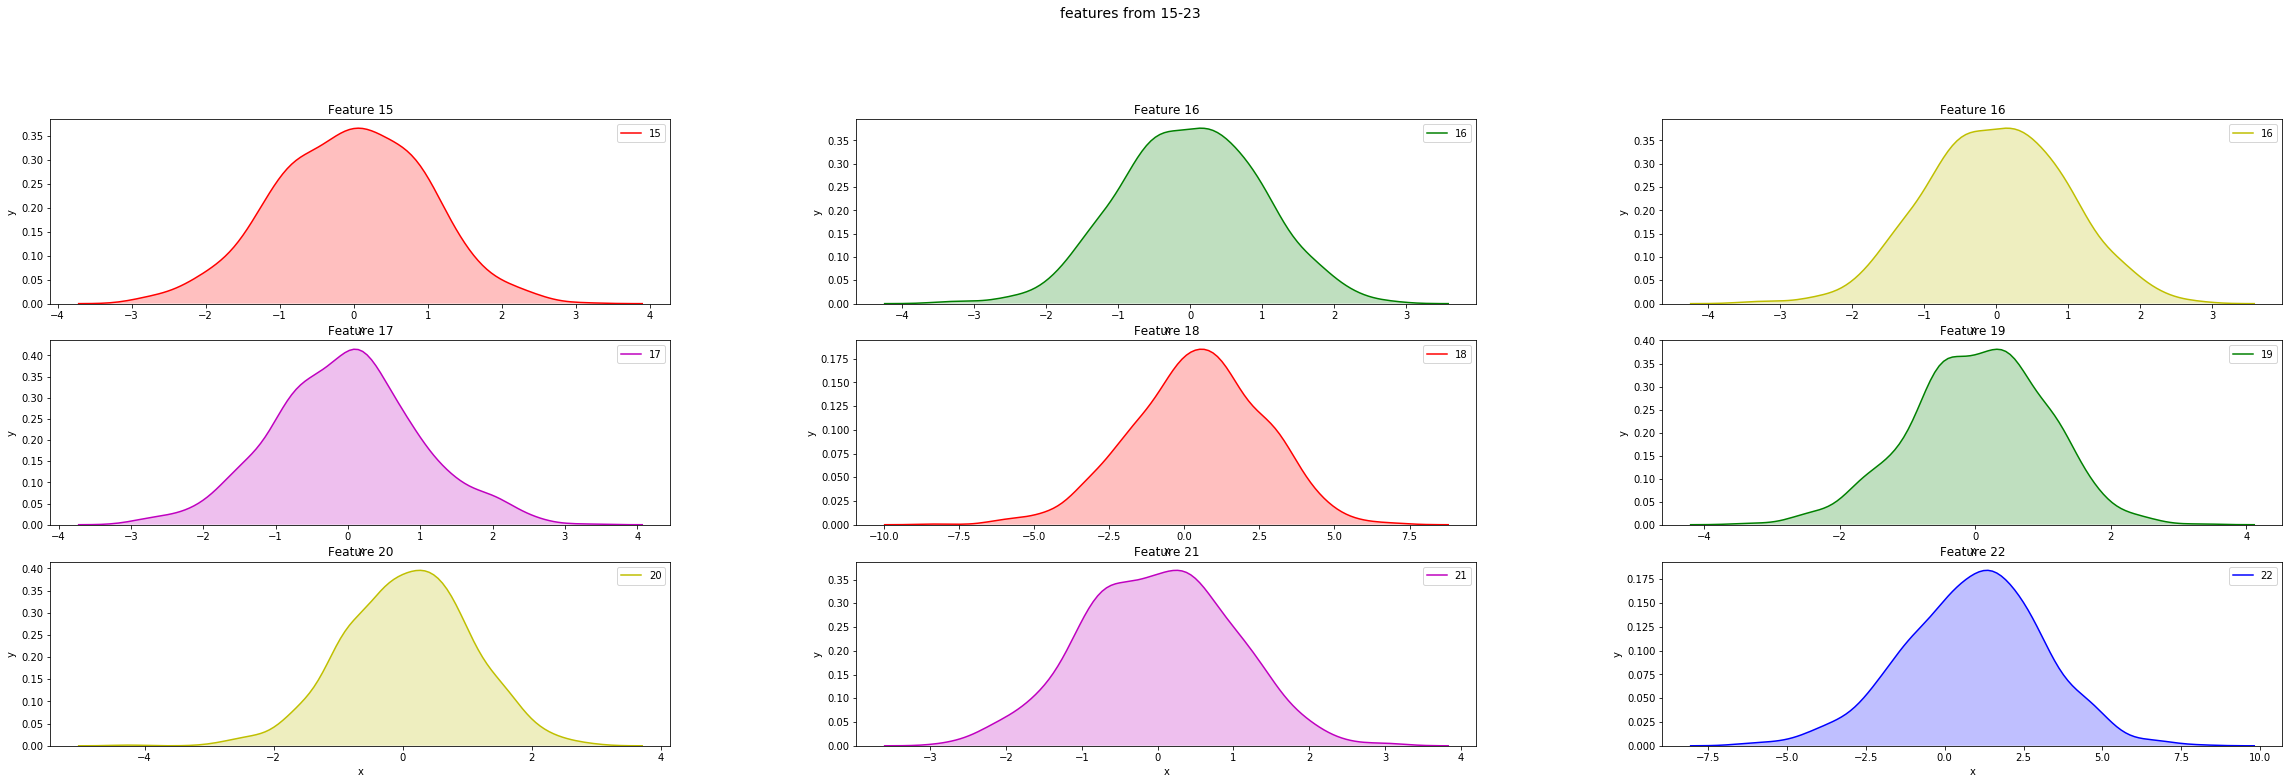

In [18]:
fig = plt.figure(figsize=(40,12))
title = fig.suptitle("features from 15-23", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(3,3,1)
ax1.set_title("Feature 15")
ax1.set_xlabel("x")
ax1.set_ylabel("y") 
sns.kdeplot(train_df[15], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(3,3,2)
ax2.set_title("Feature 16")
ax2.set_xlabel("x")
ax2.set_ylabel("y") 
sns.kdeplot(train_df[16], ax=ax2, shade=True, color='g')

ax3 = fig.add_subplot(3,3,3)
ax3.set_title("Feature 16")
ax3.set_xlabel("x")
ax3.set_ylabel("y") 
sns.kdeplot(train_df[16], ax=ax3, shade=True, color='y')

ax4 = fig.add_subplot(3,3,4)
ax4.set_title("Feature 17")
ax4.set_xlabel("x")
ax4.set_ylabel("y") 
sns.kdeplot(train_df[17], ax=ax4, shade=True, color='m')

ax5 = fig.add_subplot(3,3,5)
ax5.set_title("Feature 18")
ax5.set_xlabel("x")
ax5.set_ylabel("y") 
sns.kdeplot(train_df[18], ax=ax5, shade=True, color='r')

ax6 = fig.add_subplot(3,3,6)
ax6.set_title("Feature 19")
ax6.set_xlabel("x")
ax6.set_ylabel("y") 
sns.kdeplot(train_df[19], ax=ax6, shade=True, color='g')

ax7 = fig.add_subplot(3,3,7)
ax7.set_title("Feature 20")
ax7.set_xlabel("x")
ax7.set_ylabel("y") 
sns.kdeplot(train_df[20], ax=ax7, shade=True, color='y')

ax8 = fig.add_subplot(3,3,8)
ax8.set_title("Feature 21")
ax8.set_xlabel("x")
ax8.set_ylabel("y") 
sns.kdeplot(train_df[21], ax=ax8, shade=True, color='m')

ax9 = fig.add_subplot(3,3,9)
ax9.set_title("Feature 22")
ax9.set_xlabel("x")
ax9.set_ylabel("y") 
sns.kdeplot(train_df[22], ax=ax9, shade=True, color='b')

In [17]:
for i in range(5):
    print("mean of ",i,"st column is",train_df[i].mean())
    print("variance of ",i,"st column is",train_df[i].var())
    print("skewnwess of ",i,"st column is",train_df[i].skew())
    print("kurtosis of ",i,"st column is",train_df[i].kurtosis())
    print("********************************************************")

mean of  0 st column is 0.025595662282000047
variance of  0 st column is 1.0166335836619573
skewnwess of  0 st column is -0.007463672726646221
kurtosis of  0 st column is -0.06678812127293998
********************************************************
mean of  1 st column is -0.02452601845299997
variance of  1 st column is 1.03286241296968
skewnwess of  1 st column is 0.005842245294997654
kurtosis of  1 st column is 0.062100204386050795
********************************************************
mean of  2 st column is -0.024088199632000016
variance of  2 st column is 0.9586543899005348
skewnwess of  2 st column is -0.015665849017949433
kurtosis of  2 st column is -0.34071760533959905
********************************************************
mean of  3 st column is -0.002271434913999985
variance of  3 st column is 0.9420149876724324
skewnwess of  3 st column is -0.02495747029209778
kurtosis of  3 st column is 0.032938497073362605
********************************************************
mean o

In [16]:
mean_data=[]
variance_data=[]
skewness_data=[]
kurtosis_data=[]
for i in range(40):
    mean=train_df[i].mean()
    variance=train_df[i].var()
    skewness=train_df[i].skew()
    kurtosis=train_df[i].kurtosis()
    mean_data.append(mean)
    variance_data.append(variance)
    skewness_data.append(skewness)
    kurtosis_data.append(kurtosis)
    

<h5>Let's understand which are positively skewed and negatively skewed</h5>

In [17]:
pos_cnt=0
neg_cnt=0
noskew_cnt=0
for i in range(40):
    if skewness_data[i]>0 :
        pos_cnt=pos_cnt+1
    elif skewness_data[i]==0 :
        noskew_cnt=noskew_cnt+1
    else:
        neg_cnt=neg_cnt+1

In [18]:
skewness_data=pd.DataFrame(skewness_data)

In [19]:
skewness_data.describe()

,0
count,40.000000
mean,-0.009768
std,0.137172
min,-0.413463
25%,-0.088602
50%,-0.004146
75%,0.064467
max,0.333917


<h5>If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.</h5>

In [20]:
print(kurtosis_data)

[-0.06678812127293998, 0.062100204386050795, -0.34071760533959905, 0.032938497073362605, 0.40408228155540904, -0.17764980070170866, 0.07081009014193063, -0.03665977840988921, -0.24288869617402753, 0.12484887380321785, -0.08288255602576244, -0.17233819645289516, -0.19092096627333133, -0.08942978106121746, -0.10481449918049002, -0.20237884004564188, -0.02980281192599943, 0.07261122972348844, 0.15164873714095561, 0.05081499046512494, 0.22042402001862715, -0.22144329365684, 0.16676352764547087, 0.4026092773469587, -0.08203532741524278, 0.05860473526570109, -0.032730131410513064, -0.06919436514209965, 0.27910645532442935, 0.1512511103517471, -0.22582960205134617, -0.07794669205025473, -0.04116648332350881, 0.021867527535804232, -0.15484479086682024, 0.05103248454165188, -0.3557122921047733, -0.010117071119550847, 0.31159319578961453, 0.40669086103185403]


In [21]:
kurtosis_data=pd.DataFrame(kurtosis_data)

In [22]:
kurtosis_data.describe()

,0
count,40.000000
mean,0.000788
std,0.192502
min,-0.355712
25%,-0.117322
50%,-0.031266
75%,0.085671
max,0.406691


<h5>Platykurtic: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution. 
The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.
The reason for this is because the extreme values are less than that of the normal distribution.</h5>

In [23]:
import missingno as msno

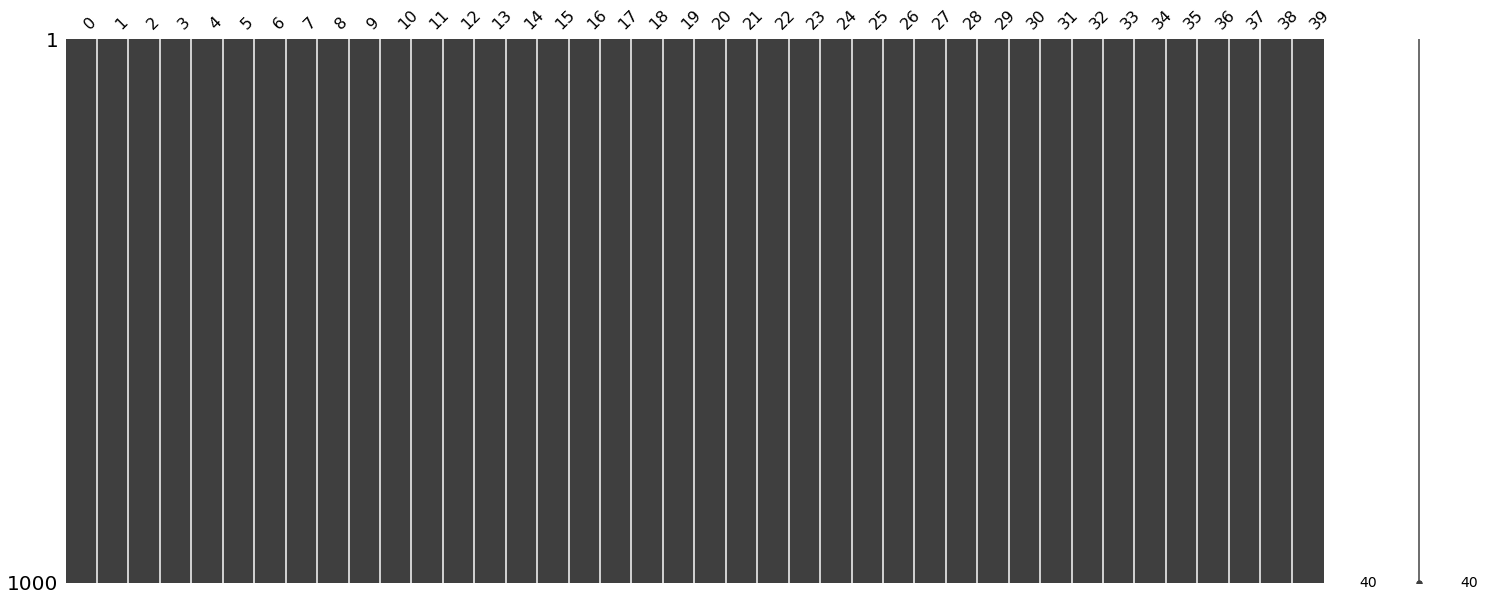

In [24]:
msno.matrix(train_df)

<h4>No missing values</h4>

<h2>Correlations</h2>

In [59]:
train_df_corr=train_df.corr().abs().unstack().sort_values(kind="quicksort",ascending=False).reset_index()

In [72]:
train_df_corr.head(5)

,Feature 1,Feature 2,Correlation Coefficient
0,39,39,1.0
2,21,21,1.0
4,23,23,1.0
6,25,25,1.0
8,27,27,1.0


In [73]:
train_df_corr.shape

(800, 3)

In [74]:
train_df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'},inplace=True)

In [75]:
train_df_corr_nd=train_df_corr.drop(train_df_corr[train_df_corr['Correlation Coefficient']==1.0].index)

In [76]:
train_df_corr_nd.shape

(780, 3)

In [77]:
train_df_corr_nd[train_df_corr_nd['Correlation Coefficient']>0.5]

,Feature 1,Feature 2,Correlation Coefficient
40,28,12,0.616709
42,23,4,0.568959
44,28,4,0.522373


<h4>Here we see three sets of features are collinear</h4>
<h4>There exists multi-collinearity also with features 28,4 and 12</h4>

<h3>Let's plot pair plots between these features to see it visually</h3>

In [87]:
type(train_df[28])

pandas.core.series.Series

In [84]:
y_df['target'].index

RangeIndex(start=0, stop=1000, step=1)

In [95]:
data_28_12_t = pd.DataFrame([train_df[28],train_df[12],y_df['target']])

In [100]:
data_28_12_t=data_28_12_t.T

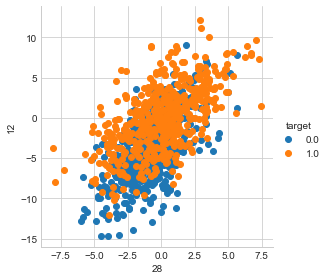

In [109]:
sns.set_style("whitegrid");
sns.FacetGrid(data_28_12_t, hue='target', size=4) \
   .map(plt.scatter,28,12) \
   .add_legend();
plt.show();

In [111]:
data_28_4_t = pd.DataFrame([train_df[28],train_df[4],y_df['target']])

In [114]:
data_28_4_t=data_28_4_t.T

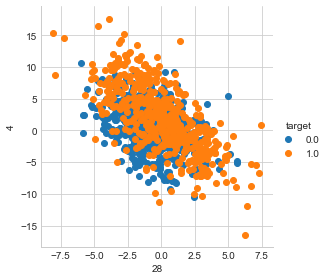

In [115]:
sns.set_style("whitegrid");
sns.FacetGrid(data_28_4_t, hue='target', size=4) \
   .map(plt.scatter,28,4) \
   .add_legend();
plt.show();

In [116]:
data_23_4_t = pd.DataFrame([train_df[23],train_df[4],y_df['target']])

In [117]:
data_23_4_t=data_23_4_t.T

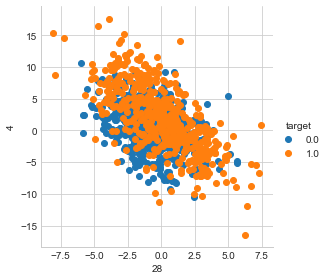

In [118]:
sns.set_style("whitegrid");
sns.FacetGrid(data_28_4_t, hue='target', size=4) \
   .map(plt.scatter,28,4) \
   .add_legend();
plt.show();

<h4>Let's also check for spearman's rank correlation co-efficient to check if some other features are monotonically increasing</h4>

In [127]:
scipy.stats.spearmanr(train_df[0],train_df[1])[0]

-0.011579207579207579

In [128]:
train_df_spear_corr=train_df.corr(method='pearson').abs().unstack().sort_values(kind="quicksort",ascending=False).reset_index()

In [130]:
train_df_spear_corr.head(5)

,level_0,level_1,0
0,39,39,1.0
1,28,28,1.0
2,21,21,1.0
3,22,22,1.0
4,23,23,1.0


In [131]:
train_df_spear_corr.shape

(1600, 3)

In [133]:
train_df_spear_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'},inplace=True)

In [142]:
train_df_spear_corr_nd=train_df_spear_corr.drop(train_df_spear_corr[train_df_spear_corr['Correlation Coefficient']==1.0].index)

In [143]:
train_df_spear_corr_nd.shape

(1560, 3)

In [144]:
train_df_spear_corr_nd[train_df_spear_corr_nd['Correlation Coefficient']>0.5]

,Feature 1,Feature 2,Correlation Coefficient
40,28,12,0.616709
41,12,28,0.616709
42,23,4,0.568959
43,4,23,0.568959
44,28,4,0.522373
45,4,28,0.522373


In [69]:
train_df_corr.drop(train_df_corr.iloc[1::2].index, inplace=True)

In [70]:
train_df_corr.shape

(800, 3)

<h2>Applying T-SNE</h2>

In [222]:
%%time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(train_df)

Wall time: 9.93 s


In [223]:
tsne_data.shape

(1000, 2)

In [224]:
tsne_data[:5]

array([[-15.382365 ,  10.910027 ],
       [ -2.3878129, -18.3407   ],
       [ -3.8885148, -41.24441  ],
       [  3.6905572,  27.194754 ],
       [ -2.4043465, -41.7676   ]], dtype=float32)

In [225]:
y_df.shape

(1000, 1)

In [227]:
y_df[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [228]:
y_df=np.array(y_df)

In [229]:
y_df.shape

(1000, 1)

In [230]:
tsne_data

array([[-15.382365 ,  10.910027 ],
       [ -2.3878129, -18.3407   ],
       [ -3.8885148, -41.24441  ],
       ...,
       [-30.764711 ,  13.745965 ],
       [ 26.749474 , -12.998135 ],
       [  4.236785 ,  17.24269  ]], dtype=float32)

In [231]:
tsne_data.shape

(1000, 2)

In [232]:
y_df.shape

(1000, 1)

In [233]:
tsne_data.T.shape

(2, 1000)

In [234]:
y_df[1]

array([0], dtype=int64)

In [235]:
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T

In [236]:
tsne_data_combined.shape

(1000, 3)

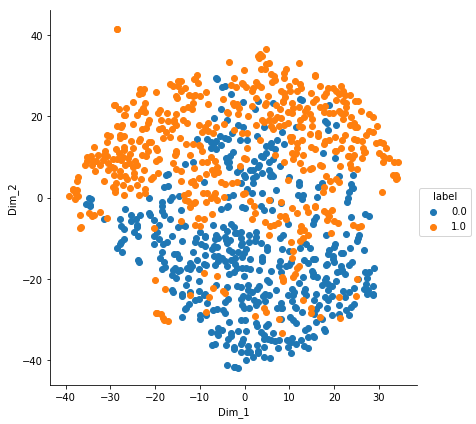

In [241]:
import seaborn as sn
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

<h4>T-SNE plot looks better than PCA</h4>
<h5>Let's further do hyperparameter tuning to get better results</h5>

In [248]:
tsne_data.shape

(1000, 2)

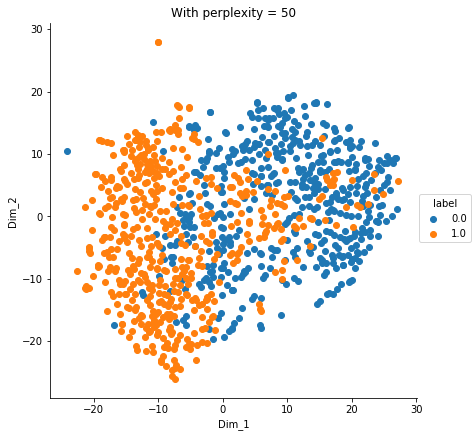

Wall time: 12.1 s


In [249]:
%%time
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(train_df) 

# creating a new data fram which help us in ploting the result data
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

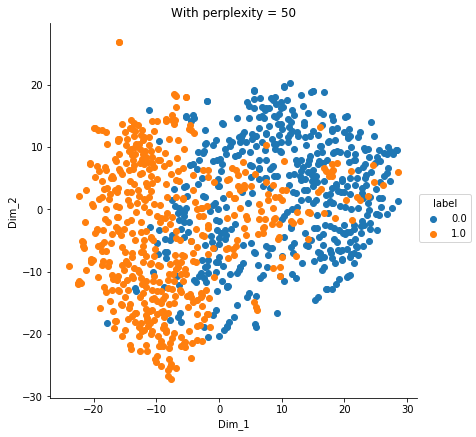

Wall time: 25.6 s


In [250]:
%%time
model = TSNE(n_components=2, random_state=0, perplexity=50,n_iter=5000)
tsne_data = model.fit_transform(train_df) 

# creating a new data fram which help us in ploting the result data
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

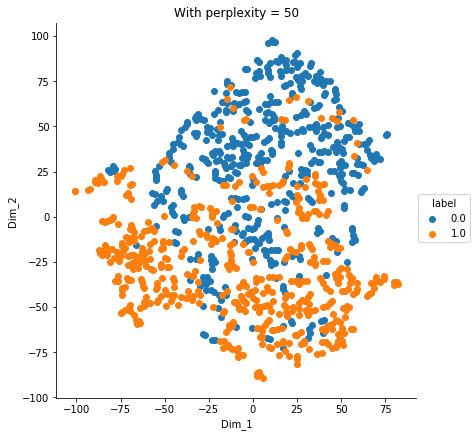

Wall time: 38.9 s


In [251]:
%%time
model = TSNE(n_components=2, random_state=0, perplexity=10,n_iter=5000)
tsne_data = model.fit_transform(train_df) 

# creating a new data fram which help us in ploting the result data
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

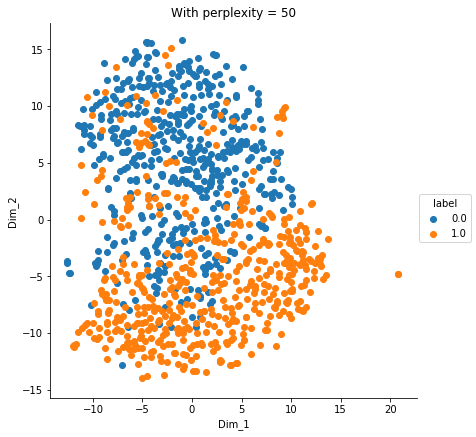

Wall time: 26.6 s


In [252]:
%%time
model = TSNE(n_components=2, random_state=0, perplexity=80,n_iter=5000)
tsne_data = model.fit_transform(train_df) 

# creating a new data fram which help us in ploting the result data
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

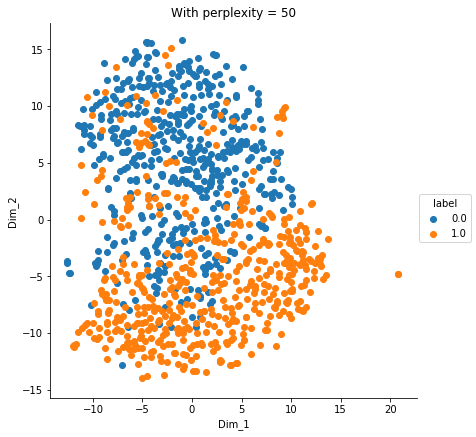

Wall time: 25.7 s


In [255]:
%%time
model = TSNE(n_components=2, random_state=0, perplexity=80,n_iter=10000)
tsne_data = model.fit_transform(train_df) 

# creating a new data fram which help us in ploting the result data
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

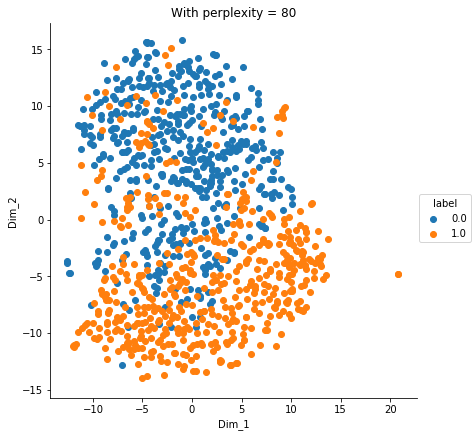

Wall time: 26.2 s


In [257]:
%%time
model = TSNE(n_components=2, random_state=0, perplexity=80,n_iter=20000)
tsne_data = model.fit_transform(train_df) 

# creating a new data fram which help us in ploting the result data
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 80')
plt.show()

<h2>With a perplexity of 80 and no.of iterations as 20000,we can simply separate the two categories using a simple line.</h2>

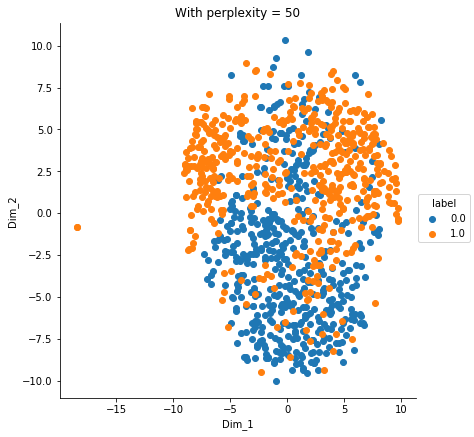

Wall time: 22.3 s


In [253]:
%%time
model = TSNE(n_components=2, random_state=0, perplexity=120,n_iter=5000)
tsne_data = model.fit_transform(train_df) 

# creating a new data fram which help us in ploting the result data
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

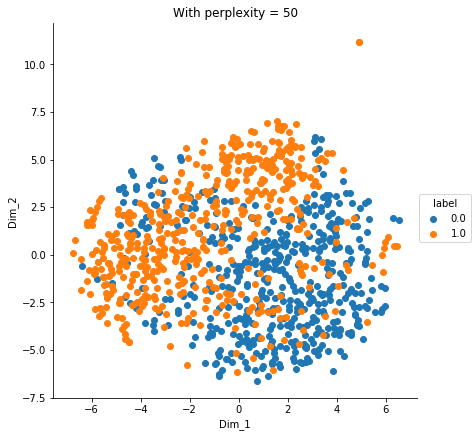

Wall time: 22.4 s


In [254]:
%%time
model = TSNE(n_components=2, random_state=0, perplexity=180,n_iter=5000)
tsne_data = model.fit_transform(train_df) 

# creating a new data fram which help us in ploting the result data
tsne_data_combined = np.vstack((tsne_data.T,y_df.T)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

<h2>Applying PCA</h2>

In [242]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [243]:
%%time
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(train_df)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (1000, 2)
Wall time: 47.9 ms


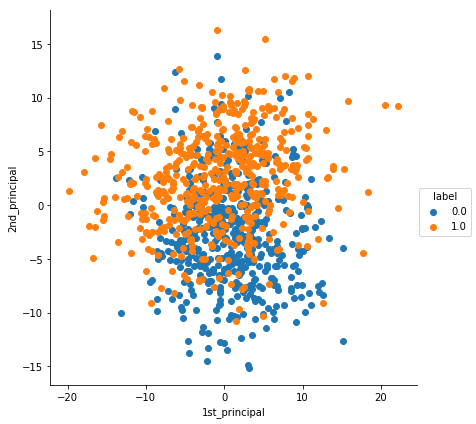

In [244]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y_df.T)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

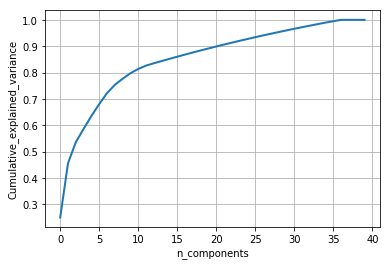

In [245]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 40
pca_data = pca.fit_transform(train_df)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

<h4>With 20 components we can explain 90 percent of variance</h4>

<h2>Let's make the data guassian using box-cox transform</h2>

In [25]:
from sklearn import preprocessing
pt = quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
train_df_qt=pt.fit_transform(train_df)

<h2>Checking normality using K-S test</h2>

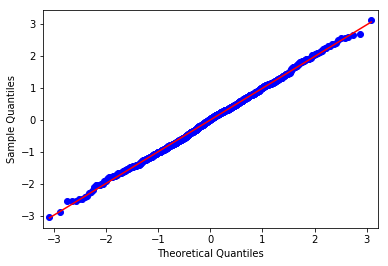

In [33]:
from statsmodels.graphics.gofplots import qqplot
qqplot(train_df[5], line='s')
plt.show()

<h2>Deciling</h2>

<h1>Now let's do bucketing of continous variables in python</h1>

In [17]:
decile=[]
decile=pd.DataFrame(decile)

In [18]:
for i in range(40):
    decile[i]=pd.cut(train_df[i],10,labels=False)

In [19]:
type(decile[1][1])

numpy.int64

In [20]:
decile[0].value_counts()

4    243
5    234
6    180
3    160
7     76
2     66
8     18
1     14
9      5
0      4
Name: 0, dtype: int64

In [21]:
decile[1]

0      3
1      5
2      4
3      4
4      4
5      4
6      4
7      0
8      2
9      3
10     4
11     4
12     5
13     4
14     4
15     5
16     6
17     5
18     3
19     4
20     7
21     6
22     5
23     3
24     4
25     4
26     4
27     5
28     4
29     6
      ..
970    7
971    4
972    4
973    4
974    5
975    6
976    2
977    5
978    5
979    6
980    6
981    4
982    6
983    7
984    1
985    3
986    6
987    5
988    7
989    7
990    6
991    5
992    4
993    2
994    5
995    6
996    5
997    2
998    3
999    4
Name: 1, Length: 1000, dtype: int64

In [20]:
decile.columns=decile.columns.astype('str')

<h2>Function for VIF</h2>

Correlation alone can't check multi-collinearity properly

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [24]:
vif_reduced=calculate_vif_(decile, thresh=5.0)

dropping '23' at index: 23
dropping '4' at index: 4
dropping '12' at index: 11
dropping '39' at index: 36
dropping '18' at index: 16
dropping '20' at index: 17
dropping '6' at index: 5
dropping '38' at index: 32
dropping '28' at index: 22
dropping '16' at index: 13
dropping '3' at index: 3
dropping '19' at index: 13
dropping '37' at index: 27
dropping '22' at index: 14
dropping '1' at index: 1
dropping '0' at index: 0
dropping '30' at index: 17
dropping '34' at index: 20
dropping '10' at index: 5
dropping '32' at index: 17
dropping '8' at index: 3
dropping '11' at index: 4
dropping '14' at index: 5
dropping '24' at index: 8
dropping '29' at index: 11
dropping '5' at index: 1
dropping '13' at index: 3
dropping '26' at index: 7
dropping '31' at index: 8
dropping '27' at index: 7
dropping '7' at index: 1
dropping '33' at index: 6
dropping '35' at index: 6
dropping '25' at index: 5
dropping '15' at index: 2
dropping '17' at index: 2
dropping '21' at index: 2
Remaining variables:
Index(['2'

<h1>Minimum Description Length Binning</h1>

In [33]:
from mdlp.discretization import MDLP

In [34]:
transformer = MDLP()
X_disc=transformer.fit_transform(train_df,y_df)

In [35]:
np.unique(X_disc[:][44])

array([0., 1., 2.])

In [36]:
X_disc[800]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1.])

In [37]:
X_disc_transpose=np.transpose(X_disc)

In [38]:
for i in range(40):
     print(np.unique(X_disc_transpose[i]))

[0.]
[0.]
[0.]
[0.]
[0. 1.]
[0.]
[0. 1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0. 1. 2. 3.]
[0.]
[0. 1. 2.]
[0.]
[0.]
[0.]
[0. 1.]
[0.]
[0.]
[0.]
[0.]
[0. 1.]
[0.]
[0.]
[0.]
[0.]
[0. 1.]
[0.]
[0.]
[0.]
[0. 1.]
[0.]
[0. 1. 2.]
[0.]
[0. 1.]
[0.]
[0.]
[0. 1.]


<h3>Some are discretized into only one category which really doesn't make sense</h3>

1.vif
2.I.V
3.chi-square test
4.See the percentage of 1s in diffrent buckets and check if the percentages are higher and if 
5.it is damn high, give a new flag feature with 1s in that paricular bucket

<h3>Check for multi collinearity</h3>

<h4>Multi-collinearity is also possible when the correlation between pairs of variables are small.</h4>

<h4>VIF values for the included variables should be less than 10</h4>

<h2>Procedure to remove multi-collinearity</h2>
<h4>get vif values + or - 10 and drop the closest feature.</h4>
<h4>Iterate the above process till u get some features with vif values <5  </h4>

<h3>Selecting features based on information value</h3>

In [22]:
decile[2].nunique()

10

In [22]:
def calc_iv(df, feature, target, pr=1):

    lst = []
    
    for i in range(10):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]
    
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['grp_score'] = round((data['Distribution Good']/(data['Distribution Good'] + data['Distribution Bad']))*10, 2)
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()
    data['Efficiency'] =  abs(data['Distribution Good'] - data['Distribution Bad'])/2  
    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    d = data[['Distribution Good','Distribution Bad','Share','Bad Rate','grp_score','WoE','IV','Efficiency']]

    mydf=pd.DataFrame(data=d)

    if pr == 1:
        print(data)

    return data['IV'].values[0]

In [23]:
decile_x_y=decile

In [24]:
decile_x_y['target']=y_df

In [25]:
decile_x_y['target'].shape

(1000,)

In [ ]:
decile_x_y.rename(columns={'0':0, '1':1,'2':2,'3':3, '4':4,'5':5,'6':6, '7':7,'8':8,'9':9, '10':10,'11':11,'12':12, '13':13,'14':14,'15':15, '16':16,'17':17,'18':18, '19':19,'20':20,'21':21, '22':22,'23':23,'24':24, '25':25,'26':26,'27':27, '28':28,'29':29,'30':30, '31':31,'32':32,'33':33, '34':34,'35':35,'36':36, '37':37,'38':38,'39':39}, inplace=True)

In [27]:
calc_iv(decile_x_y,29,'target')

   Variable  Value  All  Bad     Share  Bad Rate  Distribution Good  \
4        29      1   29   11  0.029263  0.379310           0.037422   
0        29      2  112   55  0.113017  0.491071           0.118503   
1        29      3  237  129  0.239152  0.544304           0.224532   
5        29      4  254  140  0.256307  0.551181           0.237006   
6        29      5  198  101  0.199798  0.510101           0.201663   
2        29      6  101   49  0.101917  0.485149           0.108108   
7        29      7   41   16  0.041372  0.390244           0.051975   
8        29      8   19    9  0.019173  0.473684           0.020790   

   Distribution Bad  grp_score       WoE        IV  Efficiency  
4          0.021569       6.34  0.551020  0.031035    0.007927  
0          0.107843       5.24  0.094262  0.031035    0.005330  
1          0.252941       4.70 -0.119138  0.031035    0.014204  
5          0.274510       4.63 -0.146901  0.031035    0.018752  
6          0.198039       5.05  0.0

0.031034979951803775

In [28]:
%%time
iv_lst=[]
for i in range(40):
    iv= calc_iv(decile_x_y,i,'target')
    iv_lst.append(iv)

   Variable  Value  All  Bad  Share  Bad Rate  Distribution Good  \
9         0      0    4    2  0.004  0.500000           0.004082   
6         0      1   14    7  0.014  0.500000           0.014286   
5         0      2   66   41  0.066  0.621212           0.051020   
1         0      3  160   76  0.160  0.475000           0.171429   
4         0      4  243  125  0.243  0.514403           0.240816   
0         0      5  234  116  0.234  0.495726           0.240816   
2         0      6  180   94  0.180  0.522222           0.175510   
3         0      7   76   41  0.076  0.539474           0.071429   
7         0      8   18    7  0.018  0.388889           0.022449   
8         0      9    5    1  0.005  0.200000           0.008163   

   Distribution Bad  grp_score       WoE        IV  Efficiency  
9          0.003922       5.10  0.040005  0.031991    0.000080  
6          0.013725       5.10  0.040005  0.031991    0.000280  
5          0.080392       3.88 -0.454691  0.031991    0.

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


   Variable  Value  All  Bad  Share  Bad Rate  Distribution Good  \
9         6      0    1    1  0.001  1.000000           0.000000   
4         6      1   14   13  0.014  0.928571           0.002041   
5         6      2   57   47  0.057  0.824561           0.020408   
3         6      3  117   84  0.117  0.717949           0.067347   
1         6      4  242  132  0.242  0.545455           0.224490   
2         6      5  277  116  0.277  0.418773           0.328571   
0         6      6  196   77  0.196  0.392857           0.242857   
6         6      7   73   34  0.073  0.465753           0.079592   
8         6      8   21    5  0.021  0.238095           0.032653   
7         6      9    2    1  0.002  0.500000           0.002041   

   Distribution Bad  grp_score       WoE   IV  Efficiency  
9          0.001961       0.00      -inf  inf    0.000980  
4          0.025490       0.74 -2.524944  inf    0.011725  
5          0.092157       1.81 -1.507557  inf    0.035874  
3          

   Variable  Value  All  Bad     Share  Bad Rate  Distribution Good  \
1        12      1   34    5  0.034413  0.147059           0.060669   
6        12      2  106   21  0.107287  0.198113           0.177824   
8        12      3  193   62  0.195344  0.321244           0.274059   
5        12      4  232  109  0.234818  0.469828           0.257322   
0        12      5  192  121  0.194332  0.630208           0.148536   
3        12      6  140  112  0.141700  0.800000           0.058577   
7        12      7   64   56  0.064777  0.875000           0.016736   
4        12      8   23   20  0.023279  0.869565           0.006276   
9        12      9    4    4  0.004049  1.000000           0.000000   

   Distribution Bad  grp_score       WoE   IV  Efficiency  
1          0.009804       8.61  1.822658  inf    0.025433  
6          0.041176       8.12  1.462929  inf    0.068324  
8          0.121569       6.93  0.812863  inf    0.076245  
5          0.213725       5.46  0.185636  inf    

   Variable  Value  All  Bad     Share  Bad Rate  Distribution Good  \
8        18      2   19    3  0.019192  0.157895           0.033333   
2        18      3   91   17  0.091919  0.186813           0.154167   
4        18      4  178   65  0.179798  0.365169           0.235417   
1        18      5  287  158  0.289899  0.550523           0.268750   
0        18      6  230  150  0.232323  0.652174           0.166667   
3        18      7  146   93  0.147475  0.636986           0.110417   
5        18      8   34   22  0.034343  0.647059           0.025000   
7        18      9    5    2  0.005051  0.400000           0.006250   

   Distribution Bad  grp_score       WoE        IV  Efficiency  
8          0.005882       8.50  1.734601  0.424215    0.013725  
2          0.033333       8.22  1.531476  0.424215    0.060417  
4          0.127451       6.49  0.613625  0.424215    0.053983  
1          0.309804       4.65 -0.142158  0.424215    0.020527  
0          0.294118       3.62 -0.5

   Variable  Value  All  Bad  Share  Bad Rate  Distribution Good  \
6        26      0   10    5  0.010  0.500000           0.010204   
7        26      1   43   20  0.043  0.465116           0.046939   
1        26      2   81   37  0.081  0.456790           0.089796   
2        26      3  190   89  0.190  0.468421           0.206122   
5        26      4  244  132  0.244  0.540984           0.228571   
0        26      5  217  112  0.217  0.516129           0.214286   
4        26      6  145   77  0.145  0.531034           0.138776   
3        26      7   58   31  0.058  0.534483           0.055102   
8        26      8   10    6  0.010  0.600000           0.008163   
9        26      9    2    1  0.002  0.500000           0.002041   

   Distribution Bad  grp_score       WoE        IV  Efficiency  
6          0.009804       5.10  0.040005  0.017143    0.000200  
7          0.039216       5.45  0.179767  0.017143    0.003862  
1          0.072549       5.53  0.213277  0.017143    0.

   Variable  Value  All  Bad     Share  Bad Rate  Distribution Good  \
8        32      0    6    3  0.006024  0.500000           0.006173   
6        32      1   12    9  0.012048  0.750000           0.006173   
2        32      2   86   56  0.086345  0.651163           0.061728   
5        32      3  195  127  0.195783  0.651282           0.139918   
0        32      4  246  131  0.246988  0.532520           0.236626   
3        32      5  235  110  0.235944  0.468085           0.257202   
1        32      6  142   51  0.142570  0.359155           0.187243   
4        32      7   61   16  0.061245  0.262295           0.092593   
7        32      8   13    7  0.013052  0.538462           0.012346   

   Distribution Bad  grp_score       WoE        IV  Efficiency  
8          0.005882       5.12  0.048202  0.232745    0.000145  
6          0.017647       2.59 -1.050410  0.232745    0.005737  
2          0.109804       3.60 -0.575952  0.232745    0.024038  
5          0.249020       3.6

   Variable  Value  All  Bad     Share  Bad Rate  Distribution Good  \
9        38      0    3    2  0.003012  0.666667           0.002058   
6        38      1   15    6  0.015060  0.400000           0.018519   
7        38      2   50   27  0.050201  0.540000           0.047325   
0        38      3  131   58  0.131526  0.442748           0.150206   
3        38      4  249  135  0.250000  0.542169           0.234568   
2        38      5  279  152  0.280120  0.544803           0.261317   
1        38      6  175   88  0.175703  0.502857           0.179012   
5        38      7   66   29  0.066265  0.439394           0.076132   
4        38      8   28   13  0.028112  0.464286           0.030864   

   Distribution Bad  grp_score       WoE        IV  Efficiency  
9          0.003922       3.44 -0.644945  0.030406    0.000932  
6          0.011765       6.12  0.453667  0.030406    0.003377  
7          0.052941       4.72 -0.112141  0.030406    0.002808  
0          0.113725       5.6

In [29]:
print(iv_lst)

[0.031990741943036194, 0.048319796787778535, 0.07269186373321472, 0.030249542540073452, inf, 0.04903484499224029, inf, 0.01971328173513949, 0.04306556992638176, 0.018573725734592518, inf, 0.04460724826328606, inf, 0.014959451789467343, inf, 0.042625172505928344, 0.026348925304302585, 0.023720676557764792, 0.42421515942376514, inf, inf, 0.035657262380905594, 0.05836736822859618, 0.18557089993504738, 0.01934660774444637, 0.05525064905811464, 0.01714259241424145, 0.04949348282063455, inf, 0.031034979951803775, 0.050091491183639925, 0.036988555954140884, 0.23274451263846258, 0.041737955218811955, 0.2658474581538108, 0.03155365880954889, 0.26120825250897306, inf, 0.03040586850567938, 0.3171205400153102]


In [30]:
len(iv_lst)

40

In [31]:
a=[i for i in range(40)]

In [32]:
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [33]:
iv_df=pd.DataFrame()

In [34]:
iv_df['Features']=a
iv_df['Information Value']=iv_lst

In [35]:
iv_df

,Features,Information Value
0,0,0.031991
1,1,0.048320
2,2,0.072692
3,3,0.030250
4,4,inf
5,5,0.049035
6,6,inf
7,7,0.019713
8,8,0.043066
9,9,0.018574


  < 0.02	useless for prediction
  0.02 to 0.1	Weak predictor
  0.1 to 0.3	Medium predictor
  0.3 to 0.5	Strong predictor
  >0.5	Suspicious or too good to be true

In [36]:
iv_df['Information Value'][iv_df['Information Value']<=0.5][iv_df['Information Value']>=0.3]

18    0.424215
39    0.317121
Name: Information Value, dtype: float64

<h3>The feature no 18 and 39 are strong predictors</h3>

In [37]:
iv_df['Information Value'][iv_df['Information Value']<=0.3][iv_df['Information Value']>=0.1]

23    0.185571
32    0.232745
34    0.265847
36    0.261208
Name: Information Value, dtype: float64

<h3>The feature no 23,32,34,36 are medium predictors</h3>

In [38]:
iv_df['Information Value'][iv_df['Information Value']<=0.1][iv_df['Information Value']>=0.02]

0     0.031991
1     0.048320
2     0.072692
3     0.030250
5     0.049035
8     0.043066
11    0.044607
15    0.042625
16    0.026349
17    0.023721
21    0.035657
22    0.058367
25    0.055251
27    0.049493
29    0.031035
30    0.050091
31    0.036989
33    0.041738
35    0.031554
38    0.030406
Name: Information Value, dtype: float64

In [39]:
iv_df['Information Value'][iv_df['Information Value']<=0.02]

7     0.019713
9     0.018574
13    0.014959
24    0.019347
26    0.017143
Name: Information Value, dtype: float64

<h3>The feature no 7,9,13,24,26 are useless for predictors</h3>

<h3>These are some of the weak predictors</h3>

Now let's check if some strong and weak predictors change linearly or not and if it has a sudden spike, we can add some flag variables

<h4>We will take strong and medium predictors</h4>

In [23]:
decile.rename(columns={'0':0, '1':1,'2':2,'3':3, '4':4,'5':5,'6':6, '7':7,'8':8,'9':9, '10':10,'11':11,'12':12, '13':13,'14':14,'15':15, '16':16,'17':17,'18':18, '19':19,'20':20,'21':21, '22':22,'23':23,'24':24, '25':25,'26':26,'27':27, '28':28,'29':29,'30':30, '31':31,'32':32,'33':33, '34':34,'35':35,'36':36, '37':37,'38':38,'39':39}, inplace=True)

In [22]:
decile_sm=decile[[18,23,32,34,36,39]]

In [23]:
decile_sm['target']=y_df

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
decile_sm.head(5)

,18,23,32,34,36,39,target
0,6,6,4,8,7,5,1
1,5,4,6,5,5,4,0
2,3,6,2,3,5,7,0
3,5,5,2,7,6,6,1
4,3,5,5,1,6,5,0


In [25]:
decile_sm[18].value_counts().reset_index().sort_values(by=['index'])

,index,18
9,0,1
7,1,9
6,2,19
4,3,91
2,4,178
0,5,287
1,6,230
3,7,146
5,8,34
8,9,5


In [26]:
decile_sm[18][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

,index,18
6,2,3
5,3,17
3,4,65
0,5,158
1,6,150
2,7,93
4,8,22
7,9,2


In [27]:
decile_sm_18=decile_sm[18][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

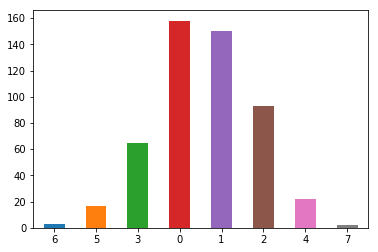

In [28]:
ax = decile_sm_18[18].plot.bar(rot=0)

In [29]:
decile_sm[23][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

,index,23
8,1,4
7,2,8
4,3,23
2,4,104
0,5,142
1,6,135
3,7,69
5,8,17
6,9,8


In [30]:
decile_sm_23=decile_sm[23][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

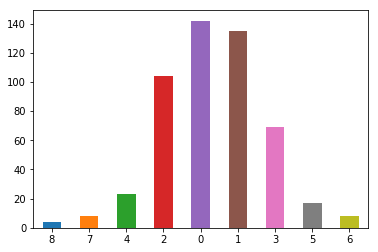

In [31]:
ax = decile_sm_23[23].plot.bar( rot=0)

In [32]:
decile_sm[32][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

,index,32
8,0,3
6,1,9
3,2,56
1,3,127
0,4,131
2,5,110
4,6,51
5,7,16
7,8,7


In [33]:
decile_sm_32=decile_sm[32][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

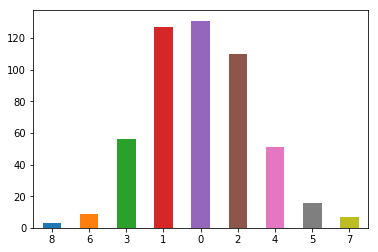

In [34]:
ax = decile_sm_32[32].plot.bar( rot=0)

In [35]:
decile_sm[34][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

,index,34
8,0,3
7,1,8
6,2,20
4,3,57
1,4,116
0,5,122
2,6,94
3,7,69
5,8,20
9,9,1


In [36]:
decile_sm_34=decile_sm[34][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

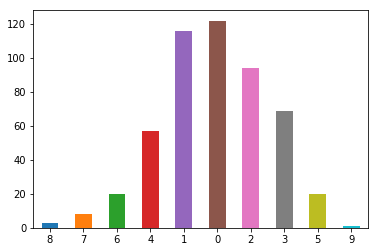

In [37]:
ax = decile_sm_34[34].plot.bar( rot=0)

In [38]:
decile_sm[36][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

,index,36
8,0,8
6,1,22
3,2,68
0,3,110
1,4,106
2,5,91
4,6,50
5,7,36
7,8,15
9,9,4


In [39]:
decile_sm_36=decile_sm[36][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

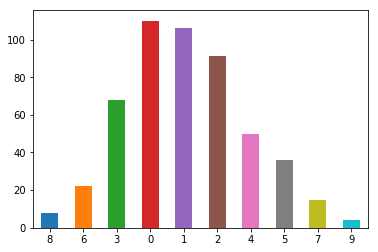

In [40]:
ax = decile_sm_36[36].plot.bar( rot=0)

In [41]:
decile_sm[39][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

,index,39
7,2,4
5,3,16
3,4,62
1,5,146
0,6,166
2,7,95
4,8,17
6,9,4


In [42]:
decile_sm_39=decile_sm[39][decile_sm['target']==1].value_counts().reset_index().sort_values(by=['index'])

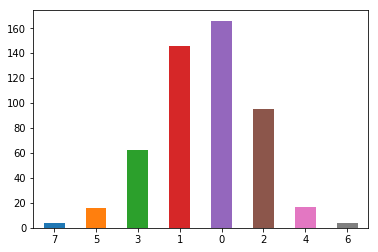

In [43]:
ax = decile_sm_39[39].plot.bar( rot=0)

<h2>Let's try out diffrent way deciling</h2>

In [44]:
decile_new=train_df[[18,23,32,34,36,39]]

In [45]:
decile_new['target']=y_df

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
decile_new.head(5)

,18,23,32,34,36,39,target
0,1.513862,4.378885,-1.833057,3.552681,3.305972,0.101050,1
1,-0.313069,-2.318885,2.038836,-0.517657,0.803699,-1.817761,0
2,-2.126474,3.758918,-3.360521,-2.751451,1.672246,2.987436,0
3,0.155612,0.680062,-3.480110,2.153133,2.767117,1.883397,1
4,-2.359881,1.735602,0.518579,-4.744566,1.830651,0.408332,0


In [47]:
decile_new[[18,'target']].sort_values(by=[18]).head(5)

,18,target
818,-8.258306,0
139,-6.358735,0
699,-6.219165,0
867,-6.019055,0
571,-5.837896,0


In [48]:
decile_new_18=decile_new[[18,'target']].sort_values(by=[18])

In [49]:
decile_new_18.index

Int64Index([818, 139, 699, 867, 571, 703, 632,  32, 226, 213,
            ...
            314, 625, 728, 839, 390,  37, 349, 883, 301, 408],
           dtype='int64', length=1000)

In [50]:
i=67
if i in range(100):
    print(i)

67


In [51]:
for i in range(1000):
    
    if i in range(100):
        decile_new_18[18].iloc[i]=0
    elif i in range(100,200):
        decile_new_18[18].iloc[i]=1
    elif i in range(200,300):
        decile_new_18[18].iloc[i]=2
    elif i in range(300,400):
        decile_new_18[18].iloc[i]=3
    elif i in range(400,500):
         decile_new_18[18].iloc[i]=4
    elif i in range(500,600):
         decile_new_18[18].iloc[i]=5
    elif i in range(600,700):
         decile_new_18[18].iloc[i]=6
    elif i in range(700,800):
         decile_new_18[18].iloc[i]=7
    elif i in range(800,900):
         decile_new_18[18].iloc[i]=8
    elif i in range(900,1000):
         decile_new_18[18].iloc[i]=9

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
decile_new_18[18].value_counts()

9.0    100
8.0    100
7.0    100
6.0    100
5.0    100
4.0    100
3.0    100
2.0    100
1.0    100
0.0    100
Name: 18, dtype: int64

In [53]:
decile_new_18[decile_new_18['target']==1][18].value_counts()

7.0    70
8.0    64
9.0    62
5.0    60
6.0    58
3.0    56
4.0    54
2.0    42
1.0    25
0.0    19
Name: 18, dtype: int64

In [54]:
decile_new_18[decile_new_18['target']==1][18].value_counts().reset_index().sort_values(by=['index'])

,index,18
9,0.0,19
8,1.0,25
7,2.0,42
5,3.0,56
6,4.0,54
3,5.0,60
4,6.0,58
0,7.0,70
1,8.0,64
2,9.0,62


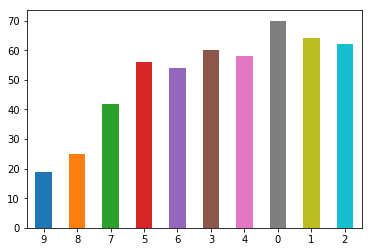

In [55]:
ax = decile_new_18[decile_new_18['target']==1][18].value_counts().reset_index().sort_values(by=['index'])[18].plot.bar( rot=0)

In [56]:
decile_new_23=decile_new[[23,'target']].sort_values(by=[23])

In [57]:
for i in range(1000):
    
    if i in range(100):
        decile_new_23[23].iloc[i]=0
    elif i in range(100,200):
        decile_new_23[23].iloc[i]=1
    elif i in range(200,300):
        decile_new_23[23].iloc[i]=2
    elif i in range(300,400):
        decile_new_23[23].iloc[i]=3
    elif i in range(400,500):
         decile_new_23[23].iloc[i]=4
    elif i in range(500,600):
         decile_new_23[23].iloc[i]=5
    elif i in range(600,700):
         decile_new_23[23].iloc[i]=6
    elif i in range(700,800):
         decile_new_23[23].iloc[i]=7
    elif i in range(800,900):
         decile_new_23[23].iloc[i]=8
    elif i in range(900,1000):
         decile_new_23[23].iloc[i]=9

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
decile_new_23[23].value_counts()

9.0    100
8.0    100
7.0    100
6.0    100
5.0    100
4.0    100
3.0    100
2.0    100
1.0    100
0.0    100
Name: 23, dtype: int64

In [59]:
decile_new_23[decile_new_23['target']==1][23].value_counts()

9.0    69
6.0    59
8.0    57
3.0    57
4.0    51
5.0    50
7.0    48
1.0    45
2.0    43
0.0    31
Name: 23, dtype: int64

In [60]:
decile_new_23[decile_new_23['target']==1][23].value_counts().reset_index().sort_values(by=['index'])

,index,23
9,0.0,31
7,1.0,45
8,2.0,43
3,3.0,57
4,4.0,51
5,5.0,50
1,6.0,59
6,7.0,48
2,8.0,57
0,9.0,69


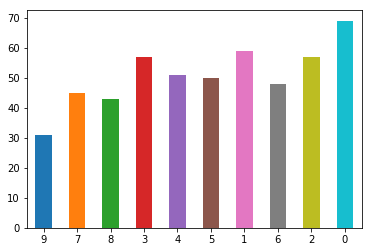

In [61]:
ax = decile_new_23[decile_new_23['target']==1][23].value_counts().reset_index().sort_values(by=['index'])[23].plot.bar( rot=0)

In [62]:
decile_new_32=decile_new[[32,'target']].sort_values(by=[32])

In [63]:
for i in range(1000):
    
    if i in range(100):
        decile_new_32[32].iloc[i]=0
    elif i in range(100,200):
        decile_new_32[32].iloc[i]=1
    elif i in range(200,300):
        decile_new_32[32].iloc[i]=2
    elif i in range(300,400):
        decile_new_32[32].iloc[i]=3
    elif i in range(400,500):
         decile_new_32[32].iloc[i]=4
    elif i in range(500,600):
         decile_new_32[32].iloc[i]=5
    elif i in range(600,700):
         decile_new_32[32].iloc[i]=6
    elif i in range(700,800):
         decile_new_32[32].iloc[i]=7
    elif i in range(800,900):
         decile_new_32[32].iloc[i]=8
    elif i in range(900,1000):
         decile_new_32[32].iloc[i]=9

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
decile_new_32[32].value_counts()

9.0    100
8.0    100
7.0    100
6.0    100
5.0    100
4.0    100
3.0    100
2.0    100
1.0    100
0.0    100
Name: 32, dtype: int64

In [67]:
decile_new_32[decile_new_32['target']==1][32].value_counts()

2.0    71
0.0    66
3.0    61
1.0    59
4.0    51
7.0    45
6.0    45
5.0    45
8.0    37
9.0    30
Name: 32, dtype: int64

In [68]:
decile_new_32[decile_new_32['target']==1][32].value_counts().reset_index().sort_values(by=['index'])

,index,32
1,0.0,66
3,1.0,59
0,2.0,71
2,3.0,61
4,4.0,51
7,5.0,45
6,6.0,45
5,7.0,45
8,8.0,37
9,9.0,30


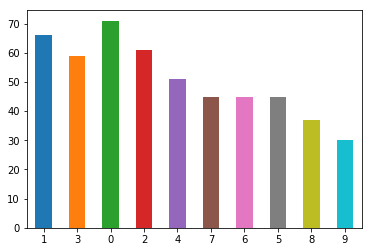

In [69]:
ax = decile_new_32[decile_new_32['target']==1][32].value_counts().reset_index().sort_values(by=['index'])[32].plot.bar( rot=0)

In [70]:
decile_new_34=decile_new[[34,'target']].sort_values(by=[34])

In [71]:
for i in range(1000):
    
    if i in range(100):
        decile_new_34[34].iloc[i]=0
    elif i in range(100,200):
        decile_new_34[34].iloc[i]=1
    elif i in range(200,300):
        decile_new_34[34].iloc[i]=2
    elif i in range(300,400):
        decile_new_34[34].iloc[i]=3
    elif i in range(400,500):
         decile_new_34[34].iloc[i]=4
    elif i in range(500,600):
         decile_new_34[34].iloc[i]=5
    elif i in range(600,700):
         decile_new_34[34].iloc[i]=6
    elif i in range(700,800):
         decile_new_34[34].iloc[i]=7
    elif i in range(800,900):
         decile_new_34[34].iloc[i]=8
    elif i in range(900,1000):
         decile_new_34[34].iloc[i]=9

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
decile_new_34[34].value_counts()

9.0    100
8.0    100
7.0    100
6.0    100
5.0    100
4.0    100
3.0    100
2.0    100
1.0    100
0.0    100
Name: 34, dtype: int64

In [73]:
decile_new_34[decile_new_34['target']==1][34].value_counts()

9.0    73
8.0    69
4.0    55
5.0    54
7.0    53
6.0    52
2.0    48
3.0    40
1.0    37
0.0    29
Name: 34, dtype: int64

In [74]:
decile_new_34[decile_new_34['target']==1][34].value_counts().reset_index().sort_values(by=['index'])

,index,34
9,0.0,29
8,1.0,37
6,2.0,48
7,3.0,40
2,4.0,55
3,5.0,54
5,6.0,52
4,7.0,53
1,8.0,69
0,9.0,73


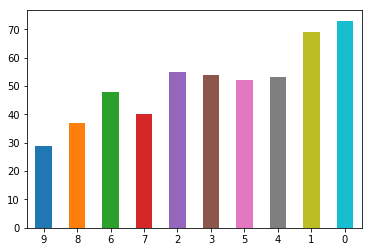

In [75]:
ax = decile_new_34[decile_new_34['target']==1][34].value_counts().reset_index().sort_values(by=['index'])[34].plot.bar( rot=0)

In [76]:
decile_new_36=decile_new[[36,'target']].sort_values(by=[36])

In [77]:
for i in range(1000):
    
    if i in range(100):
        decile_new_36[36].iloc[i]=0
    elif i in range(100,200):
        decile_new_36[36].iloc[i]=1
    elif i in range(200,300):
        decile_new_36[36].iloc[i]=2
    elif i in range(300,400):
        decile_new_36[36].iloc[i]=3
    elif i in range(400,500):
         decile_new_36[36].iloc[i]=4
    elif i in range(500,600):
         decile_new_36[36].iloc[i]=5
    elif i in range(600,700):
         decile_new_36[36].iloc[i]=6
    elif i in range(700,800):
         decile_new_36[36].iloc[i]=7
    elif i in range(800,900):
         decile_new_36[36].iloc[i]=8
    elif i in range(900,1000):
         decile_new_36[36].iloc[i]=9

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [78]:
decile_new_36[36].value_counts()

9.0    100
8.0    100
7.0    100
6.0    100
5.0    100
4.0    100
3.0    100
2.0    100
1.0    100
0.0    100
Name: 36, dtype: int64

In [79]:
decile_new_36[decile_new_36['target']==1][36].value_counts()

0.0    70
2.0    66
1.0    63
5.0    57
4.0    55
3.0    52
8.0    41
7.0    36
6.0    36
9.0    34
Name: 36, dtype: int64

In [80]:
decile_new_36[decile_new_36['target']==1][36].value_counts().reset_index().sort_values(by=['index'])

,index,36
0,0.0,70
2,1.0,63
1,2.0,66
5,3.0,52
4,4.0,55
3,5.0,57
8,6.0,36
7,7.0,36
6,8.0,41
9,9.0,34


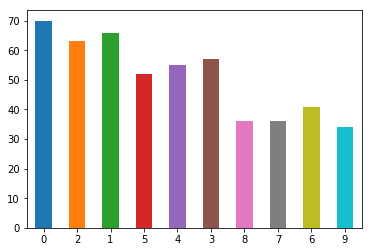

In [81]:
ax = decile_new_36[decile_new_36['target']==1][36].value_counts().reset_index().sort_values(by=['index'])[36].plot.bar( rot=0)

In [82]:
decile_new_39=decile_new[[39,'target']].sort_values(by=[39])

In [83]:
for i in range(1000):
    
    if i in range(100):
        decile_new_39[39].iloc[i]=0
    elif i in range(100,200):
        decile_new_39[39].iloc[i]=1
    elif i in range(200,300):
        decile_new_39[39].iloc[i]=2
    elif i in range(300,400):
        decile_new_39[39].iloc[i]=3
    elif i in range(400,500):
         decile_new_39[39].iloc[i]=4
    elif i in range(500,600):
         decile_new_39[39].iloc[i]=5
    elif i in range(600,700):
         decile_new_39[39].iloc[i]=6
    elif i in range(700,800):
         decile_new_39[39].iloc[i]=7
    elif i in range(800,900):
         decile_new_39[39].iloc[i]=8
    elif i in range(900,1000):
         decile_new_39[39].iloc[i]=9

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [84]:
decile_new_39[39].value_counts()

9.0    100
8.0    100
7.0    100
6.0    100
5.0    100
4.0    100
3.0    100
2.0    100
1.0    100
0.0    100
Name: 39, dtype: int64

In [85]:
decile_new_39[decile_new_39['target']==1][39].value_counts()

9.0    66
6.0    63
8.0    61
7.0    59
5.0    58
3.0    53
4.0    47
2.0    46
1.0    39
0.0    18
Name: 39, dtype: int64

In [86]:
decile_new_39[decile_new_39['target']==1][39].value_counts().reset_index().sort_values(by=['index'])

,index,39
9,0.0,18
8,1.0,39
7,2.0,46
5,3.0,53
6,4.0,47
4,5.0,58
1,6.0,63
3,7.0,59
2,8.0,61
0,9.0,66


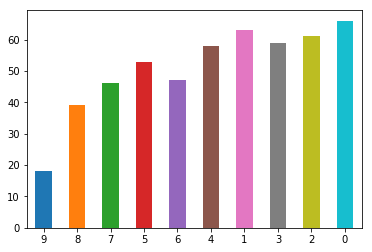

In [87]:
ax = decile_new_39[decile_new_39['target']==1][39].value_counts().reset_index().sort_values(by=['index'])[39].plot.bar( rot=0)

<h3>Feature Engineering</h3>

In [25]:
vif_reduced['result']=y_df

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
vif_reduced.head(5)

,2,9,36,result
0,8,5,7,1
1,6,3,5,0
2,5,2,5,0
3,3,2,6,1
4,7,5,6,0


In [27]:
index_max=[]
for i in ['2','9','36']:
    index_max.append(vif_reduced[vif_reduced['result']==1][i].value_counts().keys()[0])

In [28]:
print(index_max)

[5, 4, 3]


In [29]:
vif_flag =[]
vif_flag=pd.DataFrame(vif_flag)

In [30]:
vif_reduced.rename(columns={'2':0,'9':1,'36':2},inplace=True)

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [31]:
index=range(0,1000)
print(index)

columns=[0,1,2]
vif_flag = pd.DataFrame(index=index, columns=columns)

range(0, 1000)


In [32]:
vif_flag.shape

(1000, 3)

In [33]:
vif_flag.head(5)

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [34]:
print(index_max)

[5, 4, 3]


In [35]:
for i in range(3):
    for j in range(1000):  
        if(vif_reduced[i][j]==index_max[i]):
                 vif_flag[i][j]=1
        else:
                 vif_flag[i][j]=0

In [36]:
vif_flag[0].value_counts()

0    780
1    220
Name: 0, dtype: int64

In [37]:
vif_flag.rename(columns={0:3,1:4,2:5},inplace=True)

<h2>Final Features</h2>

In [38]:
vif_features=pd.concat([vif_reduced,vif_flag],axis=1)
vif_features.head(5)

,0,1,2,result,3,4,5
0,8,5,7,1,0,0,0
1,6,3,5,0,0,0,0
2,5,2,5,0,1,0,0
3,3,2,6,1,0,0,0
4,7,5,6,0,0,0,0


<h2>chi2</h2>

Reference:https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [81]:
decile.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39, 'result'],
      dtype='object')

In [84]:
decile.drop('result',axis=1,inplace=True)

In [85]:
decile.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39],
      dtype='object')

In [86]:
from sklearn.feature_selection import chi2

In [88]:
chi2(decile,y_df)

(array([2.58800040e-01, 1.27539798e+00, 4.83348943e-02, 5.11726230e-02,
        8.40274990e+00, 1.90889677e-01, 2.86538441e+01, 9.73309446e-01,
        1.38219164e+00, 6.85783062e-01, 9.90925849e-02, 2.78607254e+00,
        1.37825388e+02, 2.76763601e-01, 1.28199017e+02, 2.32183769e+00,
        2.24445899e-03, 1.21306007e-01, 3.31077125e+01, 9.07424725e-01,
        1.34678988e+00, 2.07544714e-01, 1.54684883e+00, 1.25544415e+01,
        1.58030222e-01, 7.61771849e-01, 1.36530622e+00, 3.84835599e-01,
        2.12936839e+01, 1.07491190e-01, 1.43807453e-01, 7.24671964e-02,
        2.56638021e+01, 1.84215183e+00, 3.05500607e+01, 1.08911745e-01,
        4.09725682e+01, 6.99783116e-01, 1.49495979e-01, 2.39824152e+01]),
 array([6.10945744e-01, 2.58756461e-01, 8.25986433e-01, 8.21035242e-01,
        3.74653837e-03, 6.62177176e-01, 8.65420258e-08, 3.23856197e-01,
        2.39728183e-01, 4.07602432e-01, 7.52921297e-01, 9.50870144e-02,
        7.95750602e-32, 5.98830356e-01, 1.01533830e-29, 1.2756

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [90]:
chi2_selector = SelectKBest(chi2, k=20)
X_kbest = chi2_selector.fit_transform(decile,y_df)

In [91]:
X_kbest.shape

(1000, 20)

In [94]:
X_chi2_reduced=pd.DataFrame(X_kbest)

In [95]:
X_chi2_reduced.shape

(1000, 20)

In [ ]:
References:
https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html
https://chrisalbon.com/machine_learning/feature_selection/chi-squared_for_feature_selection/
https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python
https://etav.github.io/python/vif_factor_python.html
https://campus.datacamp.com/courses/generalized-linear-models-in-python/multivariable-logistic-regression?ex=4
https://www.quora.com/How-do-I-find-the-Information-value-and-weight-of-evidence-in-Python
https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb
https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

<h3>Importing test data</h3>

In [179]:
test_df=pd.read_csv(r'C:\Users\anjineyulu\Desktop\amazon_fine_food_reviews\test_intern.csv')

In [180]:
test_df.shape

(9000, 40)

In [181]:
test_df_sm=test_df[['18','23','32','34','36','39']]

<h1>ML Models</h1>

In [88]:
train_df_final=train_df[[18,23,32,34,36,39]]

In [89]:
train_df_final.shape

(1000, 6)

In [90]:
train_df=train_df_final[:700]
cv_df=train_df_final[700:1000]

In [91]:
cv_df.shape

(300, 6)

In [92]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

<h2>Logistic Regression</h2>

for alpha = 1e-06
Log Loss : 0.6281164504577543
for alpha = 1e-05
Log Loss : 0.6027872291769563
for alpha = 0.0001
Log Loss : 0.580734919734819
for alpha = 0.001
Log Loss : 0.5887860779373358
for alpha = 0.01
Log Loss : 0.5864783335076879
for alpha = 0.1
Log Loss : 0.5569700731113394
for alpha = 1
Log Loss : 0.5644972710036202


Text(0,0.5,'Error measure')

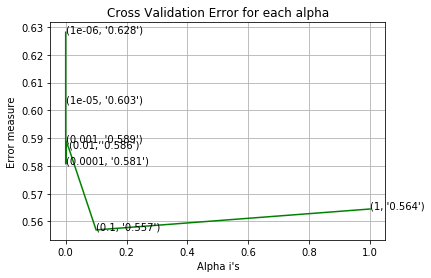

In [93]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df,y_df[:700])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(cv_df,y_df[700:])
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_df[700:],sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_df[700:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")

In [98]:
len(sig_clf_probs[:,1])

300

In [99]:
len(y_df[700:])

300

<h3>Testing on test dataset</h3>

In [94]:
best_alpha=0.1
clf = SGDClassifier(class_weight='balanced',alpha=best_alpha, penalty='l2', loss='log', random_state=42)

In [120]:
%%time
clf.fit(train_df,y_df[:700])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_df[:700])
pred_y = sig_clf.predict_proba(test_df_sm)

Wall time: 32 ms


<h5>To check stability of the cross-validation predictions</h5>

In [153]:
stability=pd.DataFrame(sig_clf_probs[:,1])

In [154]:
k=y_df['target'][700:].reset_index()

In [155]:
a=y_df['target'][700:]

In [156]:
a=pd.DataFrame(a)

In [157]:
a.set_index(k.index).head(5)

,target
0,0
1,0
2,0
3,0
4,1


In [158]:
print(type(a))

<class 'pandas.core.frame.DataFrame'>


In [159]:
stability['y']=a.values

In [163]:
stability.head(5)

,0,y
0,0.121578,0
1,0.465336,0
2,0.516451,0
3,0.215497,0
4,0.560739,1


In [167]:
b=stability.sort_values(by=[0], ascending=False)

In [173]:
for i in range(9):
    
     print(b['y'][i*30:(i+1)*30].value_counts()[1])

27
23
17
22
15
12
14
6
4


<h5>Thus the model is stable</h5>

<h3>Testing on test dataset</h3>

for alpha = 1e-06
Log Loss : 0.6238705835487985
for alpha = 1e-05
Log Loss : 0.5901651104545533
for alpha = 0.0001
Log Loss : 0.595087474052836
for alpha = 0.001
Log Loss : 0.5914554929450372
for alpha = 0.01
Log Loss : 0.5797693059437761
for alpha = 0.1
Log Loss : 0.5650338461139239
for alpha = 1
Log Loss : 0.692591523202788


Text(0,0.5,'Error measure')

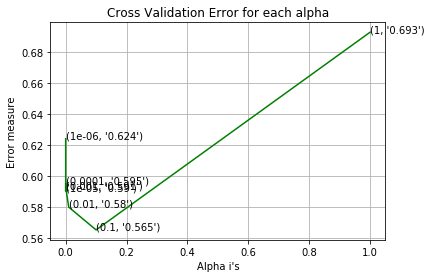

In [174]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l1', loss='log', random_state=42)
    clf.fit(train_df,y_df[:700])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(cv_df,y_df[700:])
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_df[700:],sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_df[700:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")

In [175]:
best_alpha=0.1
clf = SGDClassifier(alpha=best_alpha, penalty='l1', loss='log', random_state=42)

In [182]:
%%time
clf.fit(train_df,y_df[:700])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_df[:700])
pred_y = sig_clf.predict_proba(test_df_sm)

Wall time: 36 ms


In [82]:
pred_y=pd.DataFrame(pred_y)

In [83]:
pred_y.describe()

,0,1
count,9000.000000,9000.000000
mean,0.481924,0.518076
std,0.251398,0.251398
min,0.013408,0.015034
25%,0.267989,0.297229
50%,0.466118,0.533882
75%,0.702771,0.732011
max,0.984966,0.986592


<h5>Checking for stability</h5>

In [183]:
stability=pd.DataFrame(sig_clf_probs[:,1])

In [184]:
k=y_df['target'][700:].reset_index()

In [185]:
a=y_df['target'][700:]

In [186]:
a=pd.DataFrame(a)

In [187]:
a.set_index(k.index).head(5)

,target
0,0
1,0
2,0
3,0
4,1


In [188]:
stability['y']=a.values

In [189]:
stability.head(5)

,0,y
0,0.483357,0
1,0.483357,0
2,0.483357,0
3,0.483357,0
4,0.483357,1


In [190]:
b=stability.sort_values(by=[0], ascending=False)

In [191]:
for i in range(9):
    
     print(b['y'][i*30:(i+1)*30].value_counts()[1])

16
15
13
15
17
14
12
15
14


<h2>SVM</h2>

for alpha = 1e-06
Log Loss : 0.6106524633227098
for alpha = 1e-05
Log Loss : 0.5943977943485951
for alpha = 0.0001
Log Loss : 0.615986370173729
for alpha = 0.001
Log Loss : 0.5743501835584539
for alpha = 0.01
Log Loss : 0.5873750965314057
for alpha = 0.1
Log Loss : 0.5597425062866266
for alpha = 1
Log Loss : 0.5633549828026687


Text(0,0.5,'Error measure')

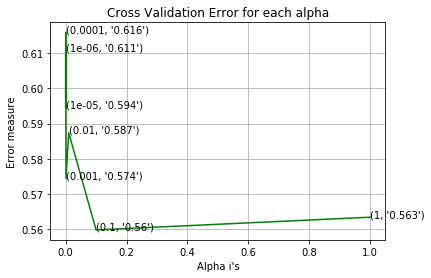

In [241]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df,y_df[:700])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(cv_df,y_df[700:])
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_df[700:],sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_df[700:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")

In [242]:
best_alpha=0.1
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='hinge', random_state=42)

In [243]:
%%time
clf.fit(train_df,y_df[:700])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_df[:700])
pred_y = sig_clf.predict_proba(test_df_sm)

Wall time: 20 ms


In [244]:
pred_y=pd.DataFrame(pred_y)

In [245]:
pred_y.describe()

,0,1
count,9000.000000,9000.000000
mean,0.482986,0.517014
std,0.261319,0.261319
min,0.008056,0.014305
25%,0.255682,0.286358
50%,0.466692,0.533308
75%,0.713642,0.744318
max,0.985695,0.991944


<h5>Checking for stability</h5>

In [246]:
stability=pd.DataFrame(sig_clf_probs[:,1])

In [247]:
k=y_df['target'][700:].reset_index()

In [248]:
a=y_df['target'][700:]

In [249]:
a=pd.DataFrame(a)

In [250]:
a.set_index(k.index).head(5)

,target
0,0
1,0
2,0
3,0
4,1


In [251]:
stability['y']=a.values

In [252]:
stability.head(5)

,0,y
0,0.122123,0
1,0.443935,0
2,0.522250,0
3,0.195174,0
4,0.582108,1


In [253]:
b=stability.sort_values(by=[0], ascending=False)

In [254]:
for i in range(9):
    
     print(b['y'][i*30:(i+1)*30].value_counts()[1])

26
24
16
25
13
13
14
5
3


<h1>K-NN</h1>

for k = 5
Log Loss : 0.43819442308579026
for k = 11
Log Loss : 0.4779524407033199
for k = 15
Log Loss : 0.4958249658210647
for k = 21
Log Loss : 0.5135142370138447
for k = 31
Log Loss : 0.521139774132327
for k = 41
Log Loss : 0.5403477014215877
for k = 51
Log Loss : 0.5525874427561255
for k = 99
Log Loss : 0.6058317392403471
Wall time: 384 ms


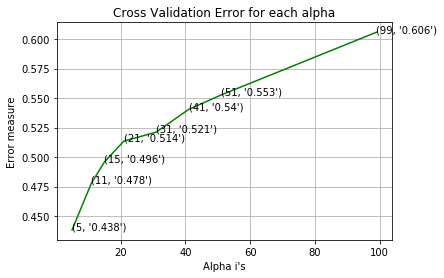

In [259]:
%%time
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for k =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df,y_df[:700])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(cv_df,y_df[700:])
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_df[700:],sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_df[700:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")

In [260]:
best_k=5
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(train_df,y_df[:700])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_df[:700])
pred_y = sig_clf.predict_proba(test_df_sm)

<h1>Sample Query Point-1</h1>

In [284]:
from collections import Counter
test_point_index = 41
predicted_cls = sig_clf.predict(train_df.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_df.iloc[test_point_index])
neighbors = clf.kneighbors(train_df.iloc[test_point_index].values.reshape(1,-1),best_k)
print("The ",best_k," nearest neighbours of the test points belongs to classes",y_df.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_df.iloc[neighbors[1][0]]['target']))

Predicted Class : 1
Actual Class : target    1
Name: 41, dtype: int64
The  5  nearest neighbours of the test points belongs to classes      target
41        1
584       1
65        1
273       0
444       1
Fequency of nearest points : Counter({1: 4, 0: 1})


In [287]:
from collections import Counter
test_point_index = 145
predicted_cls = sig_clf.predict(train_df.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_df.iloc[test_point_index])
neighbors = clf.kneighbors(train_df.iloc[test_point_index].values.reshape(1,-1),best_k)
print("The ",best_k," nearest neighbours of the test points belongs to classes",y_df.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_df.iloc[neighbors[1][0]]['target']))

Predicted Class : 0
Actual Class : target    0
Name: 145, dtype: int64
The  5  nearest neighbours of the test points belongs to classes      target
145       0
394       0
661       1
500       0
163       0
Fequency of nearest points : Counter({0: 4, 1: 1})


In [286]:
from collections import Counter
test_point_index = 78
predicted_cls = sig_clf.predict(train_df.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_df.iloc[test_point_index])
neighbors = clf.kneighbors(train_df.iloc[test_point_index].values.reshape(1,-1),best_k)
print("The ",best_k," nearest neighbours of the test points belongs to classes",y_df.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_df.iloc[neighbors[1][0]]['target']))

Predicted Class : 0
Actual Class : target    0
Name: 78, dtype: int64
The  5  nearest neighbours of the test points belongs to classes      target
78        0
1         0
695       1
168       0
534       0
Fequency of nearest points : Counter({0: 4, 1: 1})


In [288]:
from collections import Counter
test_point_index = 154
predicted_cls = sig_clf.predict(train_df.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_df.iloc[test_point_index])
neighbors = clf.kneighbors(train_df.iloc[test_point_index].values.reshape(1,-1),best_k)
print("The ",best_k," nearest neighbours of the test points belongs to classes",y_df.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_df.iloc[neighbors[1][0]]['target']))

Predicted Class : 1
Actual Class : target    1
Name: 154, dtype: int64
The  5  nearest neighbours of the test points belongs to classes      target
154       1
292       1
638       1
680       0
231       1
Fequency of nearest points : Counter({1: 4, 0: 1})


In [208]:
pred_y=pd.DataFrame(pred_y)

In [209]:
pred_y.describe()

,0,1
count,9000.000000,9000.000000
mean,0.501176,0.498824
std,0.290020,0.290020
min,0.101431,0.063360
25%,0.189468,0.207623
50%,0.478351,0.521649
75%,0.792377,0.810532
max,0.936640,0.898569


<h5>Checking for stability of the predictions</h5>

In [210]:
stability=pd.DataFrame(sig_clf_probs[:,1])

In [211]:
k=y_df['target'][700:].reset_index()

In [212]:
a=y_df['target'][700:]

In [213]:
a=pd.DataFrame(a)

In [214]:
a.set_index(k.index).head(5)

,target
0,0
1,0
2,0
3,0
4,1


In [215]:
stability['y']=a.values

In [216]:
stability.head(5)

,0,y
0,0.169323,0
1,0.508079,0
2,0.499768,0
3,0.262462,0
4,0.671430,1


In [217]:
b=stability.sort_values(by=[0], ascending=False)

In [218]:
for i in range(9):
    
     print(b['y'][i*30:(i+1)*30].value_counts()[1])

27
23
17
16
16
11
15
9
5


<h2>Random Forest</h2>

In [219]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,300,400,500]
max_depth = [3,6,9,12]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df,y_df[:700])
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(cv_df,y_df[700:])
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_df[700:],sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_df[700:], sig_clf_probs)) 


for n_estimators = 100 and max depth =  3
Log Loss : 0.4322137888095208
for n_estimators = 100 and max depth =  6
Log Loss : 0.30675916032687817
for n_estimators = 100 and max depth =  9
Log Loss : 0.258716762838388
for n_estimators = 100 and max depth =  12
Log Loss : 0.25660593675996224
for n_estimators = 200 and max depth =  3
Log Loss : 0.42353454535518753
for n_estimators = 200 and max depth =  6
Log Loss : 0.30076796438629944
for n_estimators = 200 and max depth =  9
Log Loss : 0.2584333587333743
for n_estimators = 200 and max depth =  12
Log Loss : 0.2537645340428167
for n_estimators = 300 and max depth =  3
Log Loss : 0.4257812650676596
for n_estimators = 300 and max depth =  6
Log Loss : 0.2988371591283095
for n_estimators = 300 and max depth =  9
Log Loss : 0.25287980533215604
for n_estimators = 300 and max depth =  12
Log Loss : 0.24904880953455252
for n_estimators = 400 and max depth =  3
Log Loss : 0.42572108623955596
for n_estimators = 400 and max depth =  6
Log Loss : 0.

In [220]:
best_n_estimator=300
best_max_depth=6
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(train_df,y_df[:700])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_df[:700])
pred_y = sig_clf.predict_proba(test_df_sm)

In [221]:
pred_y=pd.DataFrame(pred_y)

In [222]:
pred_y.describe()

,0,1
count,9000.000000,9000.000000
mean,0.501176,0.498824
std,0.290020,0.290020
min,0.101431,0.063360
25%,0.189468,0.207623
50%,0.478351,0.521649
75%,0.792377,0.810532
max,0.936640,0.898569


<h5>Checking for stability of predictions</h5>

In [232]:
stability=pd.DataFrame(sig_clf_probs[:,1])

In [233]:
k=y_df['target'][700:].reset_index()

In [234]:
a=y_df['target'][700:]

In [235]:
a=pd.DataFrame(a)

In [236]:
a.set_index(k.index).head(5)

,target
0,0
1,0
2,0
3,0
4,1


In [237]:
stability['y']=a.values

In [238]:
stability.head(5)

,0,y
0,0.150214,0
1,0.187349,0
2,0.261717,0
3,0.121458,0
4,0.723976,1


In [257]:
b.shape

(300, 2)

In [239]:
b=stability.sort_values(by=[0], ascending=False)

In [258]:
for i in range(9):
    
     print(b['y'][i*30:(i+1)*30].value_counts()[1])

26
24
16
25
13
13
14
5
3


6 features are selected which has good and medium predictive power using information value

<h1>Result :random Forest works the best with a log-loss of 0.2988</h1>